In [1]:
"""
Author: Omid Ahmadzadeh  
GitHub: https://github.com/Omid4mit  
Email: omid4mit@gmail.com  
Date Created: 2025-08-02
Last Modified: 2025-09-03

Description:
    This script performs data cleaning, feature engineering, exploratory analysis, and classification modeling
    to predict customer churn using the Telco Customer Churn dataset:

    - Dataset: "WA_Fn-UseC_-Telco-Customer-Churn.csv" from IBM Sample Data
    - Step 1: Data Cleaning and Preprocessing
        - Handle missing and inconsistent values
        - Encode categorical variables
        - Scale numerical features
    - Step 2: Exploratory Data Analysis (EDA)
        - Visualize tenure distribution, contract types, and churn rates
    - Step 3: Feature Engineering
        - Create encoded features for gender and churn
    - Step 4: Model Building and Evaluation
        - Train Logistic Regression, Random Forest, and Gradient Boosting classifiers
        - Evaluate models using accuracy, precision, recall, F1 score, ROC AUC, and confusion matrix

        
"""

'\nAuthor: Omid Ahmadzadeh  \nGitHub: https://github.com/Omid4mit  \nEmail: omid4mit@gmail.com  \nDate Created: 2025-08-02  \nLast Modified: 2025-09-03  \n\nDescription:\n    This script performs data cleaning, feature engineering, exploratory analysis, and classification modeling\n    to predict customer churn using the Telco Customer Churn dataset:\n\n    - Dataset: "WA_Fn-UseC_-Telco-Customer-Churn.csv" from IBM Sample Data\n    - Step 1: Data Cleaning and Preprocessing\n        - Handle missing and inconsistent values\n        - Encode categorical variables\n        - Scale numerical features\n    - Step 2: Exploratory Data Analysis (EDA)\n        - Visualize tenure distribution, contract types, and churn rates\n    - Step 3: Feature Engineering\n        - Create encoded features for gender and churn\n    - Step 4: Model Building and Evaluation\n        - Train Logistic Regression, Random Forest, and Gradient Boosting classifiers\n        - Evaluate models using accuracy, precision

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [3]:
# 1. Data Cleaning and Preprocessing
# Load Data
loadedData = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.DataFrame(loadedData)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Find Null Values in Data Frame
df.isnull().sum()
# mask = (df['TotalCharges'] == '') | (df['TotalChar ges'] == ' ')
mask = (df['TotalCharges'] == ' ')
df1 = df[mask]
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
# Replace TotalCharges Values ' ' to '' and '' to Null
df['TotalCharges'] = df['TotalCharges'].replace(' ','')
df['TotalCharges'] = df['TotalCharges'].replace('',np.nan)

In [6]:
# Convert TotalCharges Data Type from Str to Float
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

Text(0, 0.5, 'Number of Customers')

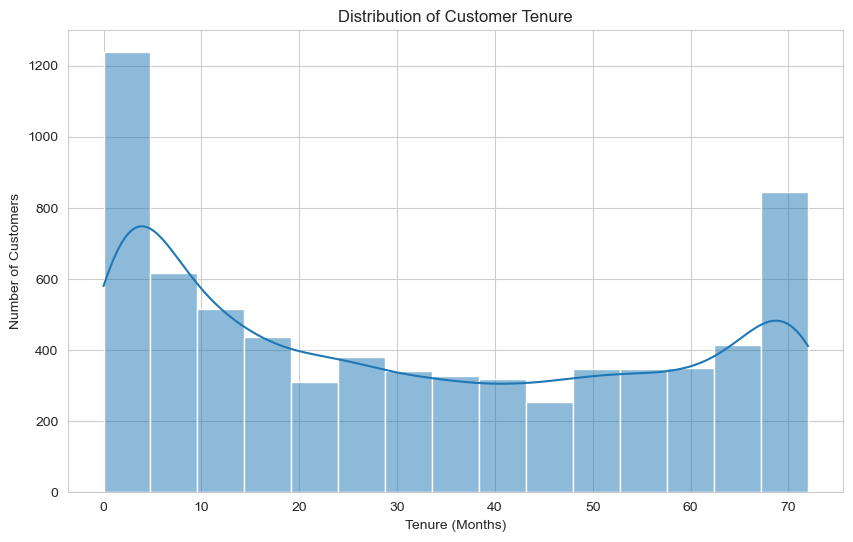

In [7]:
# 2. Exploratory Data Analysis (EDA)
# Visualize Tenur Data
figure1 = plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')
sns.histplot(df['tenure'], bins= 15, kde = True)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')

<Axes: xlabel='count', ylabel='Contract'>

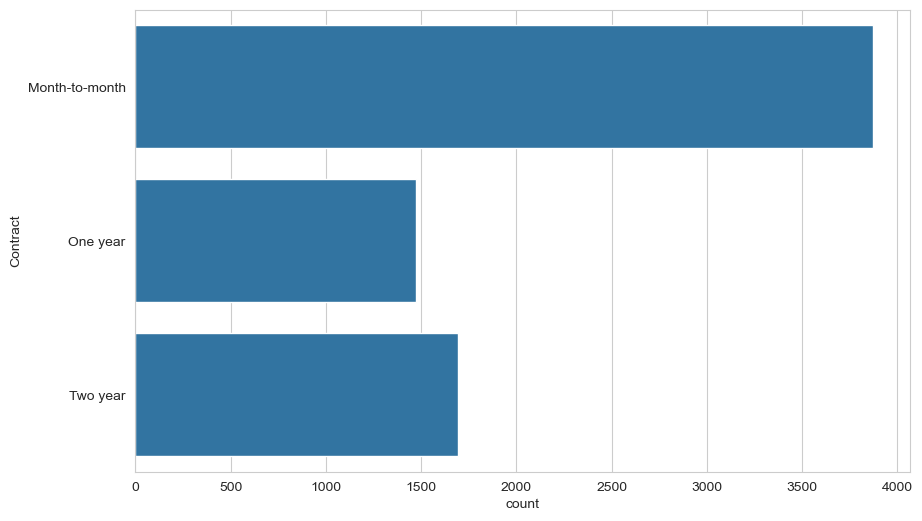

In [8]:
# Visualize Contract Data
figure2 = plt.figure(figsize = (10,6))
sns.countplot(df['Contract'])

Text(0, 0.5, 'Number of Customers')

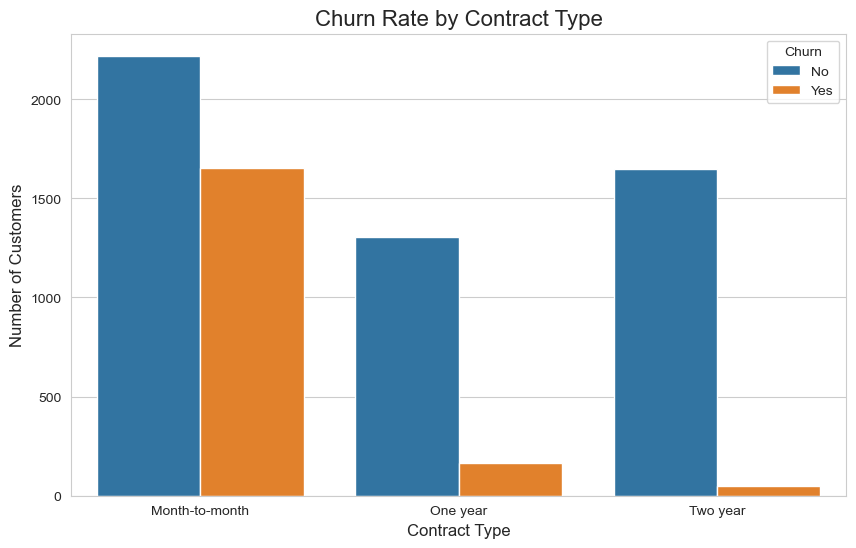

In [9]:
# Visualize Churn Data
figure3 = plt.figure(figsize = (10,6))
# sns.countplot(df['Churn'])
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

In [10]:
# 3. Feature Engineering
# OneHotEncoder for InternetService
ohe = OneHotEncoder(handle_unknown= 'ignore', sparse_output=False).set_output(transform="pandas")
oneHotTransform = ohe.fit_transform(df[['InternetService']])
oneHotTransform
df = pd.concat([df, oneHotTransform], axis = 1)

In [11]:
 # Mapping Label Encoding for gender and Churn
df['gender'].unique()
df['EncodedGender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [12]:
# 4. Model Building and Training
# Train Split Test
X = df.drop(columns = ['Churn', 'gender', 'InternetService', 'customerID'], axis = 1)
y = df['Churn']
print(X.select_dtypes(include='object').columns)
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size= 0.2, random_state= 11)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(X_encoded.shape)

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],
      dtype='object')
(7043, 31)


In [13]:
# Choose and Train Model (Logisitic Regression Classifier)
logRegModel = LogisticRegression(random_state=16, max_iter=1000)
logRegModel.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=16)

In [14]:
# Choose and Train Model (Random Forest Classifier)
randForClModel = RandomForestClassifier(random_state=42)
randForClModel.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Choose and Train Model (Gradient Boosting Classifier)
gradBoostClModel = GradientBoostingClassifier(random_state=42)
gradBoostClModel.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [16]:
# Logisitic Regression Classifier Accuracy
y_pred_logReg = logRegModel.predict(X_test_scaled)
accuracyLogReg = accuracy_score(y_pred_logReg, y_test)
accuracyLogReg

0.801277501774308

In [17]:
# Random Forest Classifier Accuracy
y_pred_randFor = randForClModel.predict(X_test_scaled)
accuracyRandFor = accuracy_score(y_pred_randFor, y_test)
accuracyRandFor

0.8019872249822569

In [18]:
# Gradient Boosting Classifier Accuracy
y_pred_gradBoost = gradBoostClModel.predict(X_test_scaled)
accuracyGradBoost = accuracy_score(y_pred_gradBoost, y_test)
accuracyGradBoost

0.8048261178140526

In [19]:
# Logisitic Regression Classifier Precision
precisionLogReg = precision_score(y_test, y_pred_logReg)
precisionLogReg

0.6540880503144654

In [20]:
# Random Forest Classifier Precision
precisionRandFor = precision_score(y_test, y_pred_randFor)
precisionRandFor

0.6736842105263158

In [21]:
# Gradient Boosting Classifier Precision
precisionGradBoost = precision_score(y_test, y_pred_gradBoost)
precisionGradBoost

0.6734006734006734

In [22]:
# Logisitic Regression Classifier Recall
recallLogReg = recall_score(y_test, y_pred_logReg)
recallLogReg

0.5502645502645502

In [23]:
# Random Forest Classifier Recall
recallRandFor = recall_score(y_test, y_pred_randFor)
recallRandFor


0.5079365079365079

In [24]:
# Gradient Boosting Classifier Recall
recallGradBoost = recall_score(y_test, y_pred_gradBoost)
recallGradBoost

0.5291005291005291

In [25]:
# Logisitic Regression Classifier F1-Score
f1LogReg = f1_score(y_test, y_pred_logReg)
f1LogReg

0.5977011494252874

In [26]:
# Random Forest Classifier F1-Score
f1RandFor = f1_score(y_test, y_pred_randFor)
f1RandFor

0.579185520361991

In [27]:
# Gradient Boosting Classifier F1_Score
f1GradBoost = f1_score(y_test, y_pred_gradBoost)
f1GradBoost

0.5925925925925926

In [28]:
# Logisitic Regression Classifier AUC ROC Score
rocAucLogReg = roc_auc_score(y_test, y_pred_logReg)
rocAucLogReg

np.float64(0.7217860093708786)

In [29]:
# Random Forest Classifier AUC ROC Score
rocAucRandFor = roc_auc_score(y_test, y_pred_randFor)
rocAucRandFor

np.float64(0.7088664110972549)

In [30]:
# Gradient Boosting Classifier AUC ROC Score
rocAucGradBoost = roc_auc_score(y_test, y_pred_gradBoost)
rocAucGradBoost


np.float64(0.7175085574697602)

In [31]:
# Logisitic Regression Classifier Cofusion Matrix
confMatLogReg = confusion_matrix(y_test, y_pred_logReg)
confMatLogReg

array([[921, 110],
       [170, 208]])

In [32]:
# Random Forest Classifier Confusion Matrix
confMatRandFor = confusion_matrix(y_test, y_pred_randFor)
confMatRandFor

array([[938,  93],
       [186, 192]])

In [ ]:
# Gradient Boosting Classifier Confusion Matrix
confMatGradBoost = confusion_matrix(y_test, y_pred_gradBoost)
confMatGradBoost

array([[934,  97],
       [178, 200]])